In [8]:
import Pkg; Pkg.activate(".")

  Activating project at `~/.julia/dev/DDA/examples`


In [10]:
import Pkg; Pkg.add("Rotations")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Rotations ─ v1.2.0
┌ Warning: The active manifest file at `/Users/fekad/.julia/dev/DDA/examples/Manifest.toml` has an old format that is being maintained.
│ To update to the new format run `Pkg.upgrade_manifest()` which will upgrade the format without re-resolving.
└ @ Pkg.Types /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.7/Pkg/src/manifest.jl:287
    Updating `~/.julia/dev/DDA/examples/Project.toml`
  [6038ab10] + Rotations v1.2.0
    Updating `~/.julia/dev/DDA/examples/Manifest.toml`
  [6038ab10] ↑ Rotations v1.1.0 ⇒ v1.2.0
┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /Users/fekad/.julia/dev/DDA/examples/Manifest.toml:0
Precompiling project...
  ✓ Rotations
  ✓ DDA
  2 dependencies successfully precompiled in 10 seconds (403 alrea

In [11]:
using LinearAlgebra

using StaticArrays
using StaticArrays: SVector

using Rotations: RotZY, RotYZ

# using Plots
using PlotlyJS


To model an EELS experiment, we consider the probe electron as a classical charge $q$ moving in vacuum with velocity $v$ parallel to the $OZ$-axis and an impact parameter $r_q$ in the $XOY$-plan. A dipole at the position $r_j = (x_j, y_j, z_j)$ is affected by an applied electric field (in the time Fourier space) given by 


$$E_{j,x}^{app} = \frac{q \omega}{2 \pi \varepsilon_0 v^2} \exp \left(i \omega \frac{z_j}{v}\right) \frac{d_{j,x}}{d_{j}} K_1\left(\frac{\omega d_j}{v}\right)$$
$$E_{j,y}^{app} = \frac{q \omega}{2 \pi \varepsilon_0 v^2} \exp \left(i \omega \frac{z_j}{v}\right) \frac{d_{j,y}}{d_{j}} K_1\left(\frac{\omega d_j}{v}\right)$$
$$E_{j,z}^{app} = -\frac{q \omega}{2 \pi \varepsilon_0 v^2} \exp \left(i \omega \frac{z_j}{v}\right) i K_0 \left(\frac{\omega d_j}{v}\right)$$

with $\mathbf{d}_j = \mathbf{r}_j-\mathbf{r}_q$ in the $XOY$-plane, and $K_m$ is the modified Bessel function of order $m$.

Relativistic correction???: $\gamma = \sqrt{1-\frac{v^2}{c^2}}$

In the visible range of the low-loss regime ($1 \, \textrm{eV}$ to $4 \, \textrm{eV}$), we can consider the velocity as constant along the electron trajectory. The total energy $\Delta E > 0$ exchange between the incident probe charge and the particle (oscillating dipole system) is defined as

$$\Delta E = \int \limits_{0}^{\infty} \hbar \omega \Gamma(\omega) \, \mathrm{d} (\hbar \omega)$$
where $\Gamma(\omega)$ is the loss probability given by
$$\Gamma(\omega) = \frac{1}{\pi \hbar^2} \sum \limits_{j=0}^{N} \mathrm{Im}\{ \mathbf{E}_{j}^{app} \cdot \mathbf{P}_{j} \}$$

??? an impact parameter $r_q$ in the $XOY$-plane. is this mean that tha z coordinate must be 0?

??? d_j is norm or vector?


Rewriting equations using wavenumber:
$$E_{j,\{x,y\}}^{app} = \frac{q}{2 \pi \varepsilon_0} \frac{k}{v_p} \frac{d_{j,\{x,y\}}}{d_{j}} K_1 \left(k d_j\right) e^{i k z_j} $$
$$E_{j,z}^{app} = - \frac{q}{2 \pi \varepsilon_0} \frac{k}{v_p} i K_0 \left(k d_j\right) e^{i k z_j}$$
where $k=\frac{\omega}{v_p}$

Rewriting equations using wavenumber:
$$E_{j,\{x,y\}}^{app} = A \frac{d_{j,\{x,y\}}}{d_{j}} K_1 \left(k d_j\right) $$
$$E_{j,z}^{app} = - A i K_0 \left(k d_j\right) $$
where $k=\frac{\omega}{v_p}$
$$A= \frac{q}{2 \pi \varepsilon_0} \frac{k}{v_p} e^{i k z_j} $$

# Incident electric field

Incident planewave:
$$
E_{inc}(r) = E_0 e^{i (kr - \omega t)}
$$

Arbitrary incident electric field = 
- [Jones vector](https://en.m.wikipedia.org/wiki/Jones_calculus) in the lab frame (x-y polarisation plane, z propagation) +
- 3D rotation of the coordinate system

Visualisation: 
- Polarisation state can be represented as a point on the Bloch (Poincare) sphere.



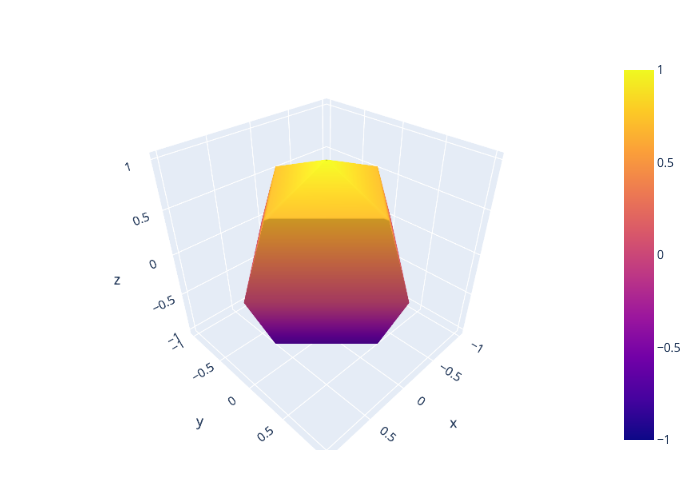

In [13]:

n = 5
u = range(-π, π; length = n)
v = range(0, π; length = n)
x = cos.(u) * sin.(v)'
y = sin.(u) * sin.(v)'
z = ones(n) * cos.(v)'


PlotlyJS.plot([PlotlyJS.surface(x=x, y=y, z=z)])


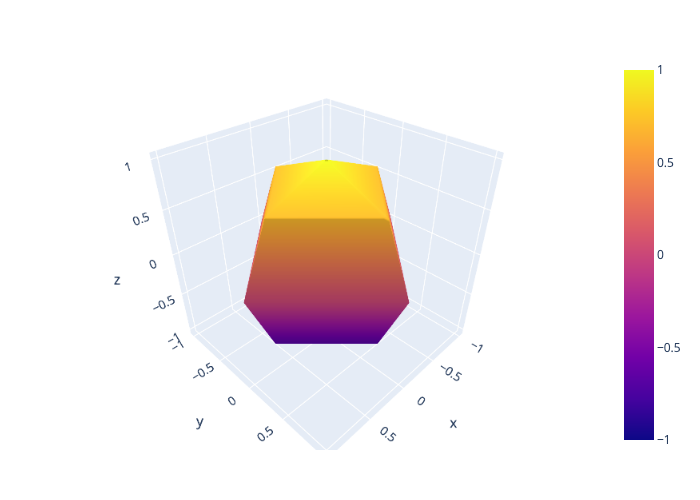

In [14]:
N = 5
u = LinRange(0, 2π, N)
v = LinRange(0, π, N)
x = cos.(u) * sin.(v)'
y = sin.(u) * sin.(v)'
z = repeat(cos.(v)',outer=[N, 1])

PlotlyJS.plot([PlotlyJS.surface(x=x,y=y,z=z)])

## Jones vector


Full information on a completely polarized state is also provided by the amplitude and phase of oscillations in two components of the electric field vector in the plane of polarization. This representation was used above to show how different states of polarization are possible. The amplitude and phase information can be conveniently represented as a two-dimensional complex vector (the Jones vector):

$$ \mathbf {e} ={\begin{bmatrix}a_{1}e^{i\theta _{1}}\\a_{2}e^{i\theta _{2}}\end{bmatrix}}.$$

The Jones vector describes the polarization of light in free space or another homogeneous isotropic non-attenuating medium, where the light can be properly described as transverse waves. Suppose that a monochromatic plane wave of light is travelling in the positive $z$-direction, with angular frequency $\omega$ and wave vector $k = (0,0,k)$, where the wavenumber $k = \omega/c$. Then the electric and magnetic fields $E$ and $H$ are orthogonal to $k$ at each point; they both lie in the plane "transverse" to the direction of motion. Furthermore, $H$ is determined from $E$ by 90-degree rotation and a fixed multiplier depending on the wave impedance of the medium. So the polarization of the light can be determined by studying $E$. The complex amplitude of $E$ is written

$$
    \begin{pmatrix} 
        E_{x}(t ) \\
        E_{y}(t) \\
        0
    \end{pmatrix} = 
    \begin{pmatrix} 
        E_{0x}e^{i(kz-\omega t+\phi _{x})} \\
        E_{0y}e^{i(kz-\omega t+\phi _{y})} \\
        0
    \end{pmatrix} = 
    \begin{pmatrix}
        E_{0x}e^{i\phi _{x}} \\
        E_{0y}e^{i\phi _{y}} \\
        0
    \end{pmatrix} e^{i(kz-\omega t)}.
$$

Note that the physical $E$ field is the real part of this vector; the complex multiplier serves up the phase information. Here $i$ is the imaginary unit with $i^{2}=-1$.

The Jones vector is

$$
\begin{pmatrix}
    E_{0x}e^{i\phi _{x}} \\
    E_{0y}e^{i\phi _{y}}
\end{pmatrix}.
$$
Thus, the Jones vector represents the amplitude and phase of the electric field in the x and y directions.


https://en.m.wikipedia.org/wiki/Quantization_of_the_electromagnetic_field

## Electromagnetic field and vector potential

As the term suggests, an EM field  consists of two vector fields, an electric field $\mathbf{E}(\mathbf{r}, t)$ and a magnetic field $\mathbf{B}(\mathbf{r}, t)$. Both are time-dependent vector fields that in vacuum depend on a third vector field $\mathbf{A}(\mathbf{r}, t)$ (the vector potential), as well as a scalar field $\phi (\mathbf{r}, t)$

$$\begin{align}
\mathbf{B}(\mathbf{r}, t) &= \boldsymbol{\nabla}\times \mathbf{A}(\mathbf{r}, t)\\
\mathbf{E}(\mathbf{r}, t) &=  - \boldsymbol{\nabla} \phi (\mathbf{r}, t) - \frac{\partial \mathbf{A}(\mathbf{r}, t)}{\partial t}, \\
\end{align}$$

where $\nabla \times \mathbf{A}$ is the curl of $\mathbf{A}$.

Choosing the Coulomb gauge, for which $\nabla \cdot \mathbf{A} = 0$, makes $\mathbf{A}$ into a transverse field. The Fourier expansion of the vector potential enclosed in a finite cubic box of volume $V = L^3$ is then

$$\mathbf{A}(\mathbf{r}, t) = \sum_\mathbf{k}\sum_{\mu=\pm 1} \left(\mathbf{e}^{(\mu)}(\mathbf{k}) a^{(\mu)}_\mathbf{k}(t) e^{i\mathbf{k}\cdot\mathbf{r}} + \bar{\mathbf{e}}^{(\mu)}(\mathbf{k})   \bar{a}^{(\mu)}_\mathbf{k}(t) e^{-i\mathbf{k}\cdot\mathbf{r}} \right),$$
where $\overline{a}$ denotes the complex conjugate of $a$. The wave vector $\mathbf{k}$ gives the propagation direction of the corresponding Fourier component (a polarized monochromatic wave) of $A(r,t)$; the length of the wave vector is

$$|\mathbf{k}| = \frac{2 \pi \nu}{c} = \frac{\omega}{c},$$

with $\mathbf{ν}$ the frequency of the mode. In this summation $\mathbf{k}$ runs over one side, positive or negative. (The component of Fourier basis $e^{-i\mathbf{k}\cdot\mathbf{r}}$ is complex conjugate of component of $e^{i\mathbf{k}\cdot\mathbf{r}}$ as $\mathbf{A}(\mathbf{r}, t)$ is real.) The components of the vector $\mathbf{k}$ have discrete values (a consequence of the boundary condition that $\mathbf{A}$ has the same value on opposite walls of the box):

$$k_x = \frac{2\pi n_x}{L},\quad k_y = \frac{2\pi n_y}{L},\quad k_z = \frac{2\pi n_z}{L}, \qquad n_x, n_y, n_z = 0,  \pm 1,  \pm 2,  \ldots.$$

Two $\mathbf{e}^{(\mu)}$ ("polarization vectors") are conventional unit vectors for left and right hand circular polarized (LCP and RCP) EM waves (See Jones calculus or Jones vector, Jones calculus) and perpendicular to $\mathbf{k}$. They are related to the orthonormal Cartesian vectors $\mathbf{e}_x$ and $\mathbf{e}_y$ through a unitary transformation,

$$\mathbf{e}^{(\pm 1)}  \equiv \frac{\mp 1}{\sqrt{2}}(\mathbf{e}_x \pm i \mathbf{e}_y) \qquad \hbox{with}\quad \mathbf{e}_x\cdot\mathbf{k} = \mathbf{e}_y\cdot\mathbf{k} = 0.$$

The $\mathbf{k}$-th Fourier component of $\mathbf{A}$  is a vector perpendicular to $\mathbf{k}$ and hence is a linear combination of  $\mathbf{e}^{(1)}$ and $\mathbf{e}^{(−1)}$. The superscript $\mu$ indicates a component along $\mathbf{e}^{(\mu)}$.
 
Clearly, the (discrete infinite) set of  Fourier coefficients $a^{(\mu)}_\mathbf{k}(t)$ and $\bar{a}^{(\mu)}_\mathbf{k}(t)$ are variables defining the vector potential. In the following they will be promoted to operators.

By using field equations of $\mathbf{B}$ and $\mathbf{E}$ in terms of $\mathbf{A}$ above, electric and magnetic fields are

$$
\begin{align}
\mathbf{E}(\mathbf{r},t) &= i \sum_{\mathbf{k}}{\sum_{\mu =\pm 1} \omega {\left( {\mathbf{e}^{(\mu )}}(\mathbf{k})a_{\mathbf{k}}^{(\mu )}(t){e^{i\mathbf{k}\cdot \mathbf{r}}}-{{\overline{\mathbf{e}}}^{(\mu )}}(\mathbf{k})\bar{a}_{\mathbf{k}}^{(\mu )}(t){{e}^{-i\mathbf{k}\cdot \mathbf{r}}} \right)}} \\ 
\mathbf{B}(\mathbf{r},t) &= i \sum_{\mathbf{k}} \sum_{\mu =\pm 1} \left \{ \left (\mathbf{k}\times {{\mathbf{e}}^{(\mu )}}(\mathbf{k}) \right ) a_{\mathbf{k}}^{(\mu )}(t) e^{i\mathbf{k}\cdot \mathbf{r}} - \left (\mathbf{k}\times {{\overline{\mathbf{e}}}^{(\mu )}}(\mathbf{k}) \right )\bar{a}_{\mathbf{k}}^{(\mu )}(t){{e}^{-i\mathbf{k}\cdot \mathbf{r}}} \right \}
\end{align}
$$
By using identity $\nabla \times e^{A\cdot r} =A\times e^{A\cdot r}$ ($A$ and $r$ are vectors) and $a_{\mathbf{k}}^{(\mu )}(t)=a_{\mathbf{k}}^{(\mu )}{{e}^{-iwt}}$ as each mode has single frequency dependence.




## Quantization of EM field

The best known example of quantization is the replacement of the time-dependent linear momentum of a particle by the rule

$$\mathbf{p}(t) \to -i\hbar\boldsymbol{\nabla}.$$

Note that Planck's constant is introduced here and that the time-dependence of the classical expression  is not taken over in the quantum mechanical operator (this is true in the so-called Schrödinger picture).

For the EM field we do something similar. The quantity $\epsilon_0$ is the electric constant, which appears here because of the use of electromagnetic SI units. The _quantization rules_ are:

$$\begin{align}
a^{(\mu)}_\mathbf{k}(t)  &\to  \sqrt{\frac{\hbar}{2 \omega V\epsilon_0}}  a^{(\mu)}(\mathbf{k}) \\
\bar{a}^{(\mu)}_\mathbf{k}(t)  &\to  \sqrt{\frac{\hbar}{2 \omega V\epsilon_0}}  {a^\dagger}^{(\mu)}(\mathbf{k}) \\
\end{align}$$

subject to the boson commutation relations

$$\begin{align}
\left [ a^{(\mu)}(\mathbf{k}), a^{(\mu')}(\mathbf{k}') \right] & = 0 \\
\left [ {a^\dagger}^{(\mu)}(\mathbf{k}),  {a^\dagger}^{(\mu')}(\mathbf{k}')\right ] &=0 \\
\left [ a^{(\mu)}(\mathbf{k}), {a^\dagger}^{(\mu')}(\mathbf{k}')\right ] &= \delta_{\mathbf{k},\mathbf{k}'} \delta_{\mu,\mu'}
\end{align}$$

The square brackets indicate a commutator, defined by $[A, B] \equiv AB - BA$ for any two quantum mechanical operators $A$  and $B$. The introduction of Planck's constant is essential in the transition from a classical to a quantum theory. The factor

$$\sqrt{\frac{1}{2\omega V \epsilon_0}}$$

is introduced to give the Hamiltonian (energy operator) a simple form, see below.

The quantized fields (operator fields) are the following

$$\begin{align}
\mathbf{A}(\mathbf{r}) &= \sum_{\mathbf{k},\mu} \sqrt{\frac{\hbar}{2 \omega V\epsilon_0}} \left \{ \mathbf{e}^{(\mu)}  a^{(\mu)}(\mathbf{k}) e^{i\mathbf{k}\cdot\mathbf{r}} +\bar{\mathbf{e}}^{(\mu)}  {a^\dagger}^{(\mu)}(\mathbf{k}) e^{-i\mathbf{k}\cdot\mathbf{r}} \right \} \\
\mathbf{E}(\mathbf{r}) &= i\sum_{\mathbf{k},\mu} \sqrt{\frac{\hbar\omega}{2  V\epsilon_0}} \left \{ \mathbf{e}^{(\mu)} a^{(\mu)}(\mathbf{k}) e^{i\mathbf{k}\cdot\mathbf{r}} - \bar{\mathbf{e}}^{(\mu)}  {a^\dagger}^{(\mu)}(\mathbf{k}) e^{-i\mathbf{k}\cdot\mathbf{r}} \right \} \\
\mathbf{B}(\mathbf{r}) &= i\sum_{\mathbf{k},\mu} \sqrt{\frac{\hbar}{2 \omega V\epsilon_0}} \left \{ \left (\mathbf{k}\times\mathbf{e}^{(\mu)} \right )  a^{(\mu)}(\mathbf{k}) e^{i\mathbf{k}\cdot\mathbf{r}} - \left (\mathbf{k}\times\bar{\mathbf{e}}^{(\mu)} \right ) {a^\dagger}^{(\mu)}(\mathbf{k} ) e^{-i\mathbf{k}\cdot\mathbf{r}} \right \}
\end{align}$$

where $\omega = c |\mathbf{k}| = c k$.

In [15]:
# # 
# # function Ei = E_inc(E0,kvec,r)
# #     [N, cols] = size(r);
# #     D = ones(N,1);
# #     kr = dot([kvec(1)*D kvec(2)*D kvec(3)*D],r,2); expikr = exp(i*kr);
# #     E1 = [E0(1)*expikr E0(2)*expikr E0(3)*expikr]; Ei = col3to1(E1);
# # end
# 
# 
# function Ei = E_inc(E0, k, r)
#     [N, cols] = size(r);
#     D = ones(N,1);
#     kr = dot([kvec(1)*D kvec(2)*D kvec(3)*D],r,2); 
#     expikr = exp(i*kr);
#     E1 = [E0(1)*expikr E0(2)*expikr E0(3)*expikr]; 
# end

In [16]:
# 
# abstract type AbstractGrid{Dim, T} end
# 
# # More abstract represantion
# struct CartesianGrid{Dim, T} <: AbstractGrid{Dim,T}
#     origin::SVector{Dim,T}
#     spacing::SVector{Dim,T}
#     dims::Dims{Dim}
#   
#     function CartesianGrid{Dim,T}(dims, origin, spacing) where {Dim,T}
#       @assert all(dims .> 0) "dimensions must be positive"
#       @assert all(spacing .> 0) "spacing must be positive"
#       new(dims, origin, spacing)
#     end
# end
# 
# # # Even more abstract
# # struct LinRange{T,L<:Integer} <: AbstractRange{T}
# #     start::T
# #     stop::T
# #     len::L
# # end
# 


Suppose that a monochromatic plane wave of light is travelling in the positive $z$-direction, with angular frequency $\omega$ and wave vector $\mathbf{k} = (0,0,k)$, where the wavenumber k = ω/c. Then the electric and magnetic fields E and H are orthogonal to k at each point; they both lie in the plane "transverse" to the direction of motion. Furthermore, H is determined from E by 90-degree rotation and a fixed multiplier depending on the wave impedance of the medium. So the polarization of the light can be determined by studying E. The complex amplitude of E is written

$$\begin{pmatrix} E_{x}(t) \\ E_{y}(t) \\ 0 \end{pmatrix} = 
\begin{pmatrix} E_{0x} e^{i(kz - \omega t + \phi_{x})} \\ E_{0y} e^{i(kz - \omega t + \phi_{y})} \\ 0 \end{pmatrix} =
\begin{pmatrix} E_{0x} e^{i\phi_{x}} \\ E_{0y} e^{i\phi_{y}} \\ 0 \end{pmatrix} e^{i(kz - \omega t)}.$$

Linear polarized in the x direction (typically called "horizontal"):
$$|H\rangle = \begin{pmatrix}1\\0\end{pmatrix}$$

Linear polarized in the y direction (typically called "vertical"):
$$|V\rangle = \begin{pmatrix}0\\1\end{pmatrix}$$

Linear polarized at 45° from the x axis (typically called "diagonal" L+45):
$$|D\rangle = \frac{1}{\sqrt{2}} \left(|H\rangle +|V\rangle \right) = \frac{1}{\sqrt{2}} \begin{pmatrix}1\\1\end{pmatrix}$$

Linear polarized at −45° from the x axis (typically called "anti-diagonal" L−45):
$$|A\rangle =\frac{1}{\sqrt{2}} \left(|H\rangle - |V\rangle\right) = \frac{1}{\sqrt{2}} \begin{pmatrix}1\\-1\end{pmatrix}$$

Right-hand circular polarized (typically called "RCP" or "RHCP"):
$$|R\rangle =\frac{1}{\sqrt{2}} \left(|H\rangle - i|V\rangle\right) = \frac{1}{\sqrt{2}} \begin{pmatrix}1\\-i\end{pmatrix}$$

Left-hand circular polarized (typically called "LCP" or "LHCP"):
$$|L\rangle =\frac{1}{\sqrt{2}} \left(|H\rangle + i|V\rangle\right) = \frac{1}{\sqrt{2}} \begin{pmatrix}1\\+i\end{pmatrix}$$

Arbitrary direction:
$$\mathbf{E}(\mathbf{r}, t) = 
\mathbf{R} \begin{pmatrix} E_{0x} e^{i\phi_{x}} \\ E_{0y} e^{i\phi_{y}} \\ 0 \end{pmatrix} e^{i (\mathbf{R} \mathbf{k}) \cdot \mathbf{r} }e^{-i \omega t}.$$




High-level interface design (usage):
- different wavelengths
- different sizes (grid size)
- different arrangements

In [17]:
# Incident field (minimal representation)
# wavenumber ::Float64
# jones vector ::SVector{ComplexF64, 2}
# rotations vector (2 angles)  ::SVector{Float64, 2}
# => 7 number (2 complex, 3 real)
# 
# struct JonesVector
#     polarisation::SVector{ComplexF64, 2}
# end
# 
# struct PlaneWave
#     wavenumber::Float64
#     polarisation::SVector{2,ComplexF64}
#     rotations::SVector{2,Float64}
# end

In [20]:

struct PlaneWave
    k::Float64
    e::SVector{2,ComplexF64}
    θ::Float64
    ϕ::Float64
end

function amplitude(E::PlaneWave, r)
    R = RotZY(E.θ, E.ϕ)
    return R[:,1:2] * E.e * exp(1im * dot(R[:,3] * E.k, r)) 
end


amplitude (generic function with 1 method)

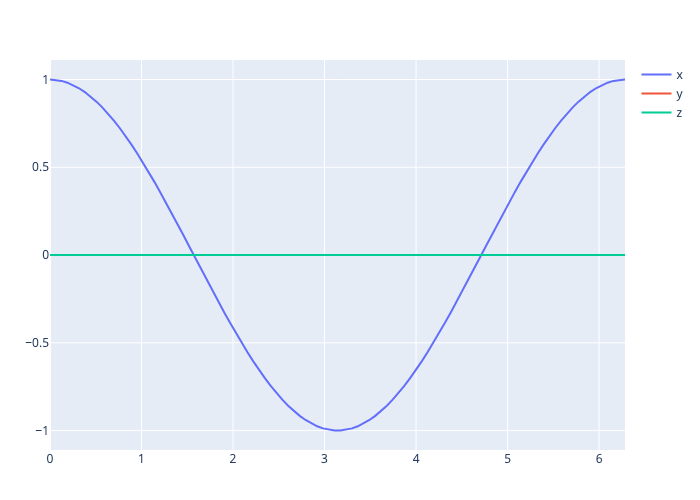

In [24]:
Einc = PlaneWave(1, (1, 0), 0., 0.)

resx=Float64[]
resy=Float64[]
resz=Float64[]
x = LinRange(0, 2π, 100)
for i in x
    r = [i,0, 0]
    # r = [0,i,0]
    r = [0,0,i]
    E = amplitude(Einc, r)
    append!(resx, real(E[1]))
    append!(resy, real(E[2]))
    append!(resz, real(E[3]))
end
trace1 = scatter(;x=x, y=resx, mode="lines", name="x")
trace2 = scatter(;x=x, y=resy, mode="lines", name="y")
trace3 = scatter(;x=x, y=resz, mode="lines", name="z")
plot([trace1, trace2, trace3])


In [25]:
# Einc = PlaneWave(1, [1, 0], 0., 0.)
Einc = PlaneWave(1, (1, -1im), 0., 0.)

E=Einc
R = RotZY(E.θ, E.ϕ)

kvec = R[:,3] * E.k

N = 100
 
f = LinRange(0, 2π, N)
r = kvec*f'

E = similar(r)

for (r, E) in zip(eachcol(r), eachcol(E))
    # @show r
    E[:] = real.(amplitude(Einc, r))
end


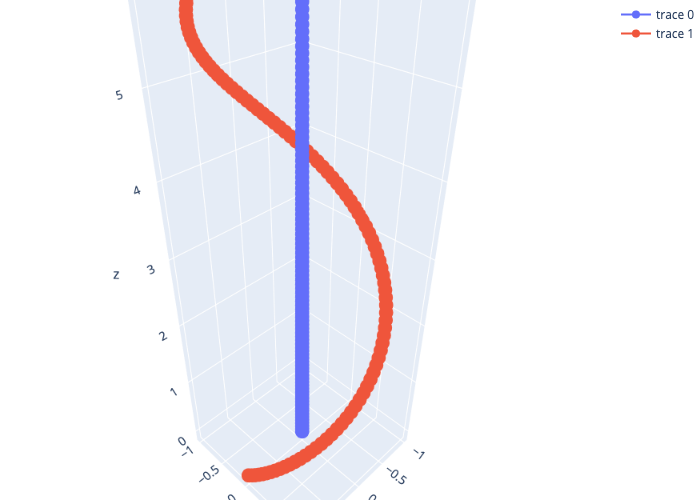

In [26]:


PlotlyJS.plot([
    scatter3d(
        x=r[1,:],
        y=r[2,:],
        z=r[3,:]
        # u=E[1,:],
        # v=E[2,:],
        # w=E[3,:],
        # sizemode="absolute",
        # sizeref=.1, 
        # anchor="tail",
        # colorscale=colors.Blues_8
    ),
    scatter3d(
        x=r[1,:]+E[1,:],
        y=r[2,:]+E[2,:],
        z=r[3,:]+E[3,:]
        # u=E[1,:],
        # v=E[2,:],
        # w=E[3,:],
        # sizemode="absolute",
        # sizeref=.1, 
        # anchor="tail",
        # colorscale=colors.Blues_8
    )],
    Layout(
        margin=attr(l=0, r=0, b=0, t=0)
    )
)

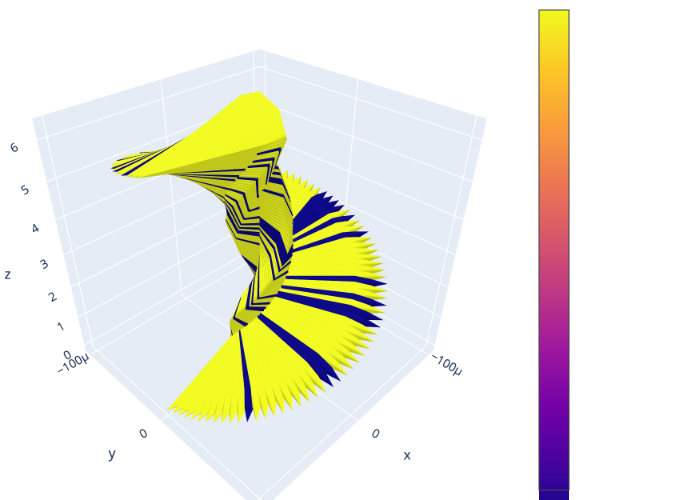

In [52]:

PlotlyJS.plot(
    cone(
        x=r[1,:],
        y=r[2,:],
        z=r[3,:],
        u=E[1,:],
        v=E[2,:],
        w=E[3,:],
        sizemode="absolute",
        sizeref=.01, 
        anchor="tail",
        # colorscale=colors.Blues_8
    ),
    Layout(
        margin=attr(l=0, r=0, b=0, t=0)
    )
)

In [41]:
# Einc = PlaneWave(1, 1/sqrt(2)*[1, -1im], 0., 0.)
Einc = PlaneWave(1, [1, 0],π/4, π/4)

N = 3000
r = Diagonal([2π,2π,4π]) * rand(3, N)

E = similar(r)
for (r, E) in zip(eachcol(r), eachcol(E))
    E[:] = real.(amplitude(Einc, r))
end

# amplitude.(Einc, collect(eachcol(r)))

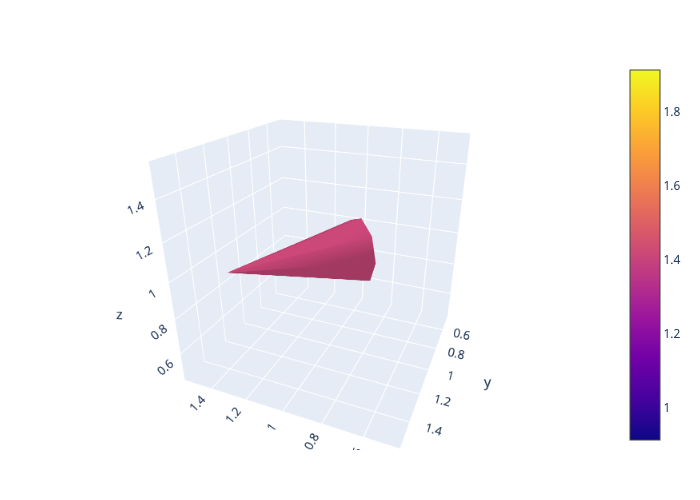

In [43]:
data = cone(x=[1], y=[1], z=[1], u=[1], v=[1], w=[0])
layout = Layout(scene_camera_eye=attr(x=-0.76, y=1.8, z=0.92))
plot(data, layout)

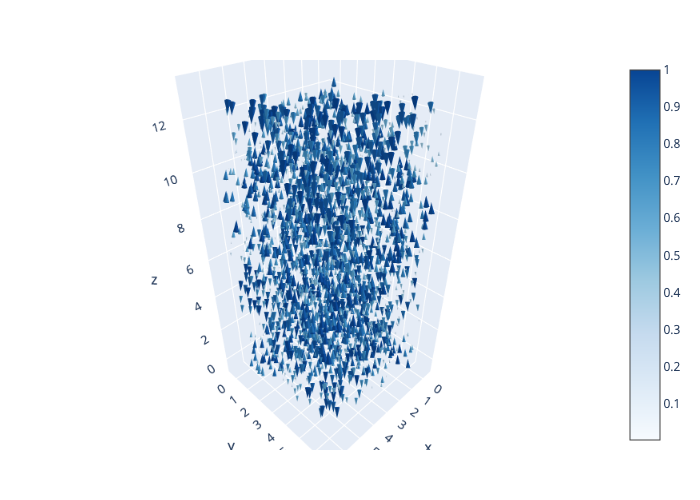

In [42]:
PlotlyJS.plot(
    cone(
        z=r[3,:],
        x=r[1,:],
        y=r[2,:],
        u=E[1,:],
        v=E[2,:],
        w=E[3,:],
        sizemode="absolute",
        sizeref=1, 
        anchor="tip",
        colorscale=colors.Blues_8
    ),
    Layout(
        scene=attr(layoutdomain_x=[0,1])
    )
)

## Appendix: Similar implementations 

In [ ]:



# Incident field (DEELS)
# 3x pol-vector ::SVector{ComplexF63,2}
# k-vector ::SVector{Float64,3}
# => 9 number (3 complex, 3 real)
#
# (1.0,0.0) (1.0,0.0) (0.0,0.0)   ! pol-vector for Extinction [-iwe option in command line]
# 0.0 0.0 1.0                     ! k-vector for Extinction [-iwe option in command line]


# Incident field (DDA-SI - Matlab)
# k wave vector ::SVector{Float64, 3}
# unit vector ::SVector{ComplexF64, 3}
# => 9 number (3 complex, 3 real)


# Incident field
# wavenumber ::Float64
# jones vector ::SVector{ComplexF64, 2}
# rotations vector (qutarnion)  ::SVector{Float64, 4}
# => 9 number (2 complex, 5 real)

# Incident field (minimal representation)
# wavenumber ::Float64
# jones vector ::SVector{ComplexF64, 2}
# rotations vector (2 angles)  ::SVector{Float64, 2}
# => 7 number (2 complex, 3 real)


# Incident field (quantum field approch, minimal representation)
# wave number ::Float64
# vector in |R> and |L> basis ::SVector{ComplexF64, 2}
# rotations vector (2 angles)  ::SVector{Float64, 2}
# => 7 number (2 complex, 3 real)
